In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv("superstore_sales.csv", encoding='latin1')

In [3]:
dataset.shape

(9994, 21)

In [4]:
dataset.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [6]:
dataset.columns.to_flat_index()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
dataset.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
print(dataset.nunique().sort_values(ascending=False))

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1850
Ship Date        1334
Order Date       1237
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Ship Mode           4
Region              4
Segment             3
Category            3
Country             1
dtype: int64


In [9]:
dataset.columns = (
    dataset.columns
    .str.strip()          # remove leading/trailing spaces
    .str.lower()          # make lowercase
    .str.replace(' ', '_')# replace spaces with underscores
    .str.replace('-', '_')# replace hyphens with underscores
)
print(dataset.columns.tolist())

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [10]:
dataset.drop(['row_id', 'country', 'postal_code', 'customer_name', 'product_name'], axis=1, inplace=True)

In [11]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset['ship_date'] = pd.to_datetime(dataset['ship_date'])
print("✅ Converted Date variables to datetime variables")

✅ Converted Date variables to datetime variables


In [12]:
dataset['year'] = dataset['order_date'].dt.year
dataset['month'] = dataset['order_date'].dt.month
dataset['week'] = dataset['order_date'].dt.isocalendar().week
dataset['day'] = dataset['order_date'].dt.day
dataset['day of week'] = dataset['order_date'].dt.day_of_week


In [13]:
dataset.duplicated().sum()

np.int64(1)

In [14]:
duplicates = dataset[dataset.duplicated(keep=False)]
print(duplicates)

            order_id order_date  ship_date       ship_mode customer_id  \
3405  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   
3406  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   

          segment      city state region       product_id  ... sub_category  \
3405  Home Office  Columbus  Ohio   East  FUR-CH-10002965  ...       Chairs   
3406  Home Office  Columbus  Ohio   East  FUR-CH-10002965  ...       Chairs   

        sales  quantity  discount   profit  year  month  week  day  \
3405  281.372         2       0.3 -12.0588  2014      4    17   23   
3406  281.372         2       0.3 -12.0588  2014      4    17   23   

      day of week  
3405            2  
3406            2  

[2 rows x 21 columns]


In [15]:
dataset.drop_duplicates(inplace=True)

In [16]:
dataset.duplicated().sum()

np.int64(0)

In [17]:
daily_sales = dataset.groupby('order_date')['sales'].sum().reset_index()
daily_sales.rename(columns={'order_date': 'ds', 'sales': 'y'}, inplace=True)

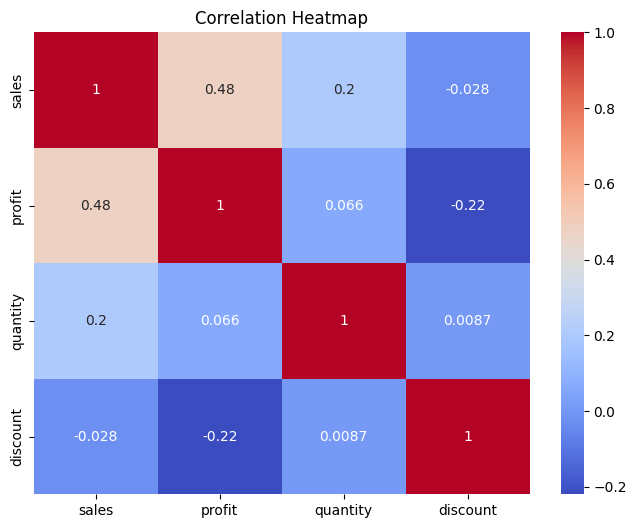

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset[['sales', 'profit', 'quantity', 'discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

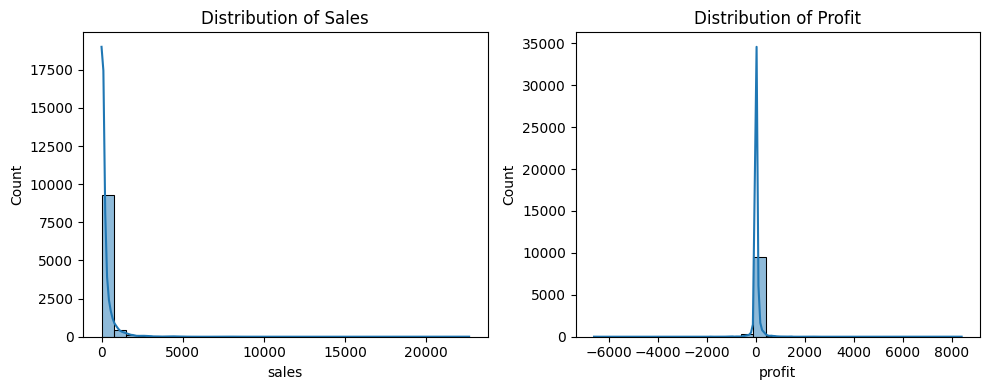

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['sales'], kde=True, bins=30)
plt.title('Distribution of Sales')

plt.subplot(1,2,2)
sns.histplot(dataset['profit'], kde=True, bins=30)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

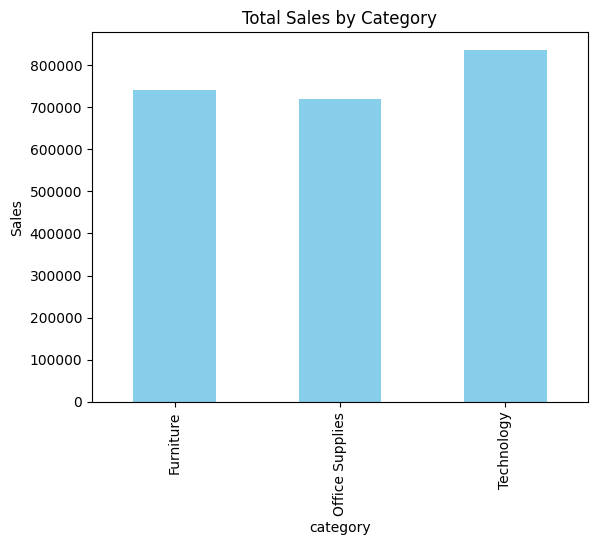

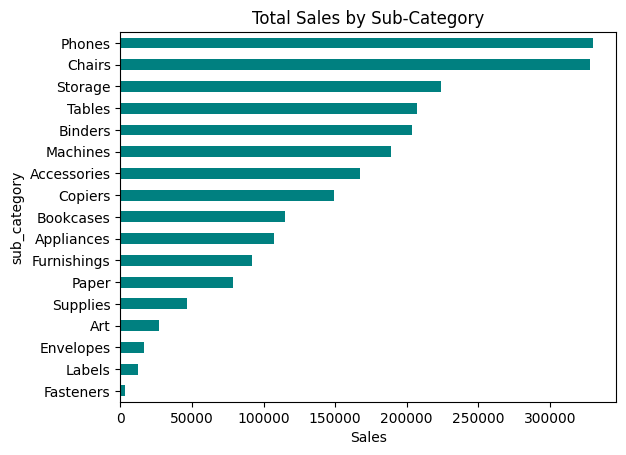

In [20]:
dataset.groupby('category')['sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

dataset.groupby('sub_category')['sales'].sum().sort_values().plot(kind='barh', color='teal')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sales')
plt.show()

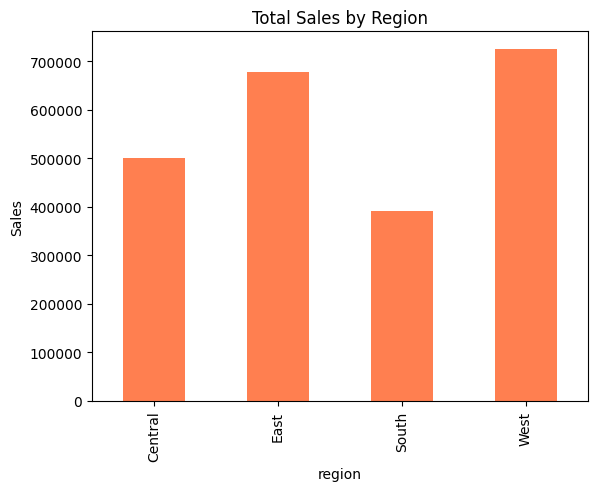

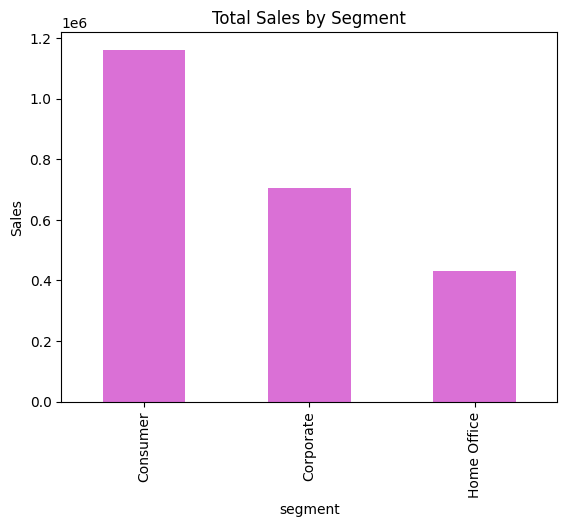

In [21]:
dataset.groupby('region')['sales'].sum().plot(kind='bar', color='coral')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.show()

dataset.groupby('segment')['sales'].sum().plot(kind='bar', color='orchid')
plt.title('Total Sales by Segment')
plt.ylabel('Sales')
plt.show()


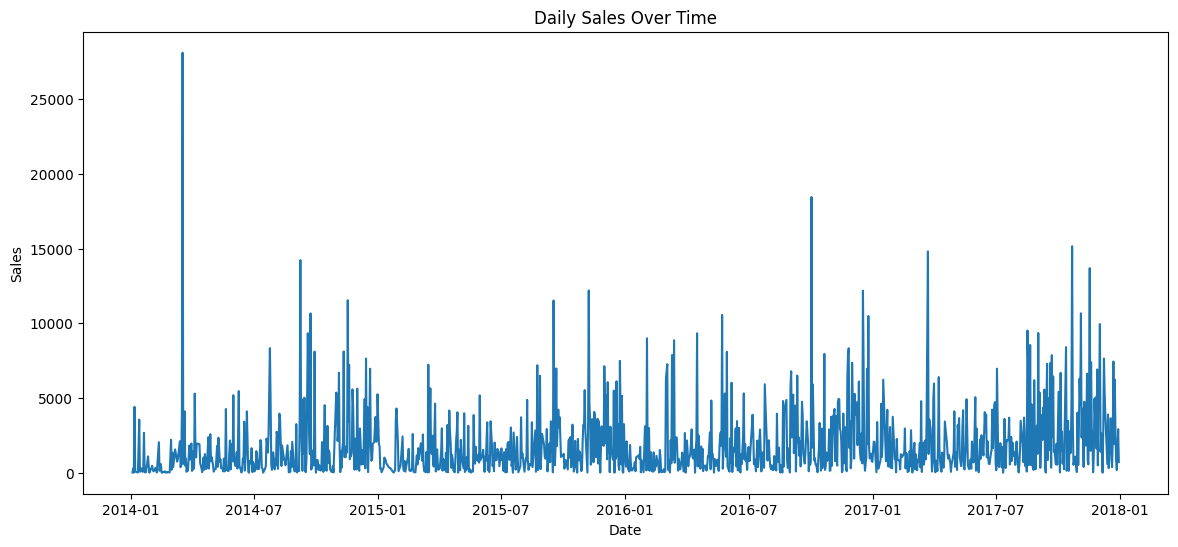

In [22]:
daily_sales = dataset.groupby('order_date')['sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_sales['order_date'], daily_sales['sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

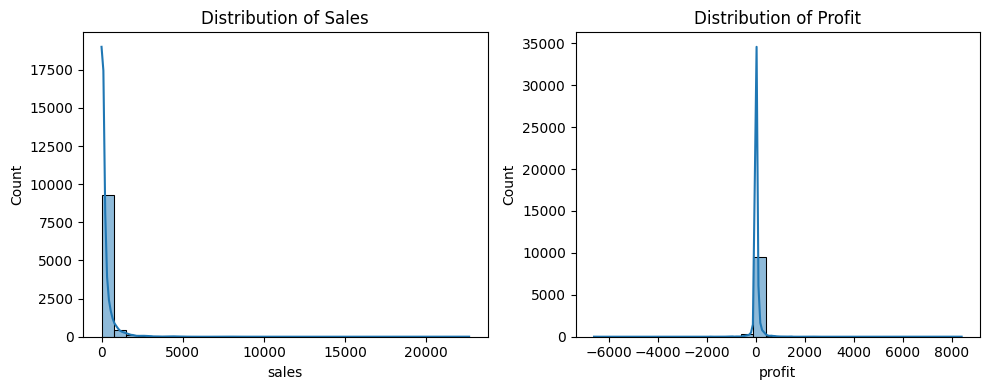

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['sales'], kde=True, bins=30)
plt.title('Distribution of Sales')

plt.subplot(1,2,2)
sns.histplot(dataset['profit'], kde=True, bins=30)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

In [24]:

Q1 = dataset['profit'].quantile(0.25)
Q3 = dataset['profit'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

dataset['profit'] = np.where(dataset['profit'] > upper_bound, upper_bound, dataset['profit'])

c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:55:17 - cmdstanpy - INFO - Chain [1] start processing
20:55:18 - cmdstanpy - INFO - Chain [1] done processing


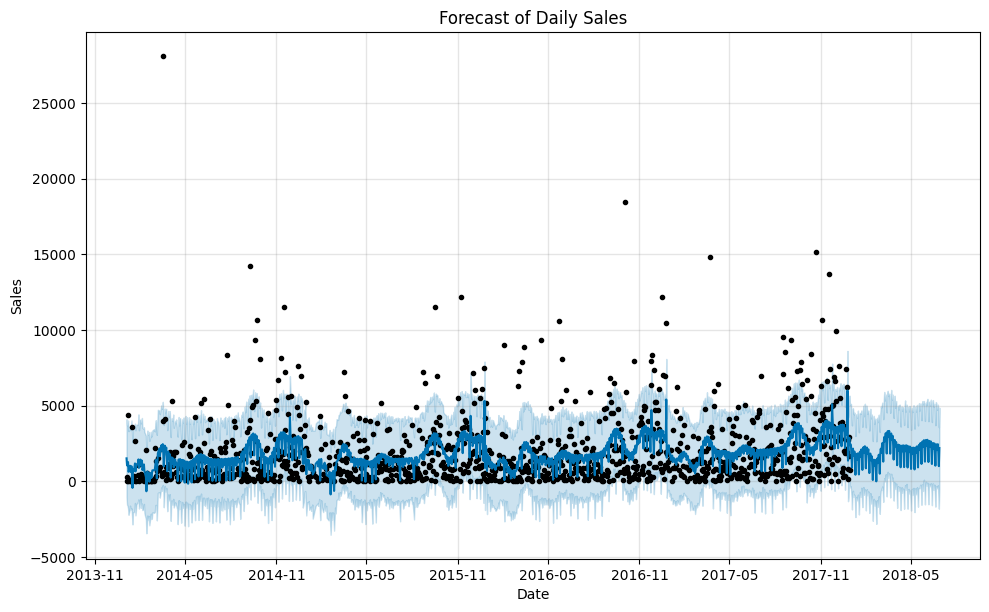

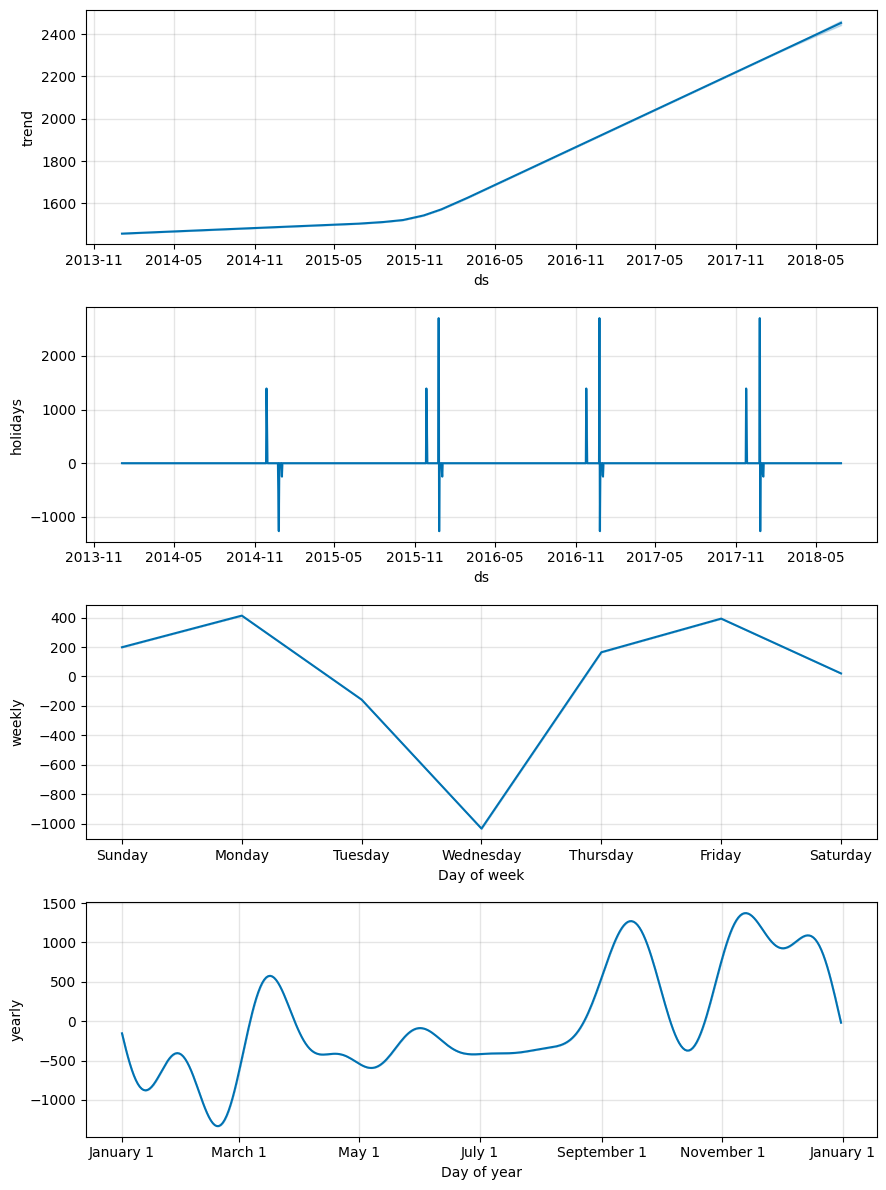

In [29]:
from prophet import Prophet

daily_sales = daily_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})
holidays = pd.DataFrame({
    'holiday': ['Black Friday']*4 + ['Christmas']*4 + ['New Year']*4,
    'ds': pd.to_datetime([
        '2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24',
        '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25',
        '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'
    ]),
    'lower_window': 0,
    'upper_window': 1
})


model = Prophet(holidays=holidays)
model.fit(daily_sales)

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:01,  2.57it/s]20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  2.64it/s]20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:01<00:00,  2.71it/s]20:55:51 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
c:\Users\bhupe\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\

  horizon           mse         rmse          mae      mape     mdape  \
0  9 days  4.482286e+06  2117.141090  1357.367739  7.929306  0.716910   
1 10 days  4.387065e+06  2094.532081  1343.988733  8.071967  0.813157   
2 11 days  4.909456e+06  2215.729249  1473.564860  7.399801  0.700705   
3 12 days  5.991520e+06  2447.758186  1639.581233  5.495845  0.772081   
4 13 days  5.003778e+06  2236.912542  1456.324065  3.612890  0.755876   

      smape  coverage  
0  0.853879  0.906250  
1  0.886055  0.906250  
2  0.899137  0.875000  
3  0.930628  0.859375  
4  0.866885  0.906250  


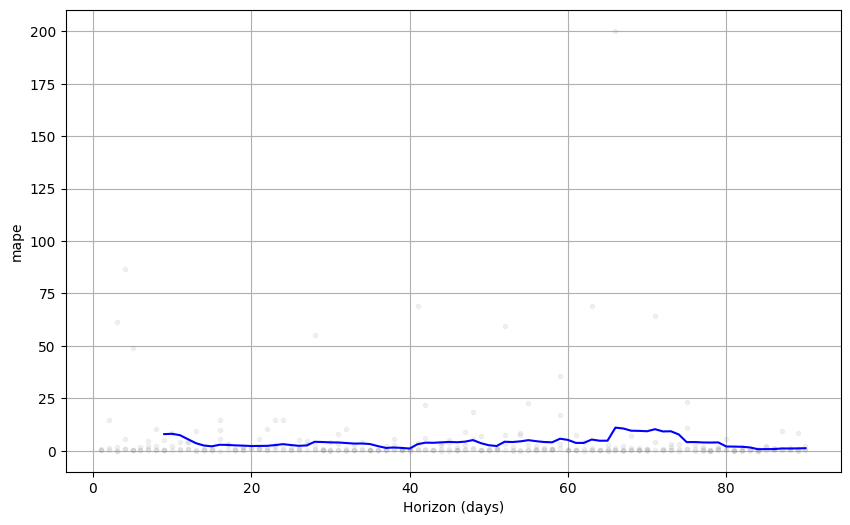

In [30]:
from prophet.diagnostics import cross_validation, performance_metrics
# horizon: how far into the future to forecast each time (e.g., 90 days)
# initial: size of the initial training period (e.g., 730 days ~ 2 years)
# period: spacing between cutoff dates

df_cv = cross_validation(model, 
                         initial='730 days', 
                         period='180 days', 
                         horizon = '90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

In [31]:
# Get the last date from your original data
last_date = daily_sales['ds'].max()

# Filter only future forecasted dates
future_forecast = forecast[forecast['ds'] > last_date]


In [32]:
# Export future forecast to CSV
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_sales.csv', index=False)

print("Forecast exported to forecasted_sales.csv")

Forecast exported to forecasted_sales.csv


In [33]:
# Export historical daily sales data to CSV
daily_sales.to_csv('daily_sales.csv', index=False)

print("Historical daily sales exported to daily_sales.csv")

Historical daily sales exported to daily_sales.csv
